<a href="https://colab.research.google.com/github/MaryamAshraff2/PRODIGY_DS_02/blob/main/Project_1_Exploratory_Data_Analysis_(EDA)_on_Titanic_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from google.colab import files
uploaded = files.upload()
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")


Saving gender_submission.csv to gender_submission.csv
Saving test.csv to test.csv
Saving train.csv to train.csv


In [8]:
from tabulate import tabulate

# Set display options
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.width', 1000)  # Set the display width

print("Training dataset:")
print(tabulate(train_data, headers='keys', tablefmt='psql'))

print("\nBasic information about the training data:")
print(tabulate(train_data.dtypes.to_frame('Dtype'), headers='keys', tablefmt='psql'))

print("\nSummary statistics of the training data:")
print(tabulate(train_data.describe(), headers='keys', tablefmt='psql'))

Training dataset:
+-----+---------------+------------+----------+------------------------------------------------------------------------------------+--------+---------+---------+---------+--------------------+----------+-----------------+------------+
|     |   PassengerId |   Survived |   Pclass | Name                                                                               | Sex    |     Age |   SibSp |   Parch | Ticket             |     Fare | Cabin           | Embarked   |
|-----+---------------+------------+----------+------------------------------------------------------------------------------------+--------+---------+---------+---------+--------------------+----------+-----------------+------------|
|   0 |             1 |          0 |        3 | Braund, Mr. Owen Harris                                                            | male   | 22      |       1 |       0 | A/5 21171          |   7.25   | B96 B98         | S          |
|   1 |             2 |          1 |      

In [12]:
# Handling missing values
# Display missing values in each column
missing_values = train_data.isnull().sum().to_frame('Missing Values')
missing_values['Percentage'] = (missing_values['Missing Values'] / len(train_data)) * 100
print("\nMissing values in the training data:")
print(tabulate(missing_values, headers='keys', tablefmt='psql'))

# Fill missing values for numerical columns with the median
num_cols = train_data.select_dtypes(include=['float64', 'int64']).columns
train_data[num_cols] = train_data[num_cols].fillna(train_data[num_cols].median())

# Fill missing values for categorical columns with the mode (most frequent value)
cat_cols = train_data.select_dtypes(include=['object']).columns
for col in cat_cols:
    mode = train_data[col].mode()
    if not mode.empty:
        train_data[col] = train_data[col].fillna(mode[0])

# Correcting data types
# Example: Converting any relevant columns to categorical or datetime types
# train_data['SomeColumn'] = pd.to_datetime(train_data['SomeColumn'], errors='coerce') # Example for datetime conversion
# train_data['CategoricalColumn'] = train_data['CategoricalColumn'].astype('category')  # Example for categorical conversion

# Data inconsistency handling
# Identifying unique values in categorical columns to check for inconsistencies
for col in cat_cols:
    unique_vals = train_data[col].unique()
    print(f"\nUnique values in column '{col}':")
    print(unique_vals)

# Manual correction if needed (example for correcting spelling mistakes or standardizing case)
# train_data['CategoricalColumn'] = train_data['CategoricalColumn'].str.lower().str.strip()

# Print cleaned data
print("\nCleaned Training dataset:")
print(tabulate(train_data.head(), headers='keys', tablefmt='psql'))

# Save the cleaned data to a new CSV file
train_data.to_csv("cleaned_train_data.csv", index=False)


Missing values in the training data:
+-------------+------------------+--------------+
|             |   Missing Values |   Percentage |
|-------------+------------------+--------------|
| PassengerId |                0 |            0 |
| Survived    |                0 |            0 |
| Pclass      |                0 |            0 |
| Name        |                0 |            0 |
| Sex         |                0 |            0 |
| Age         |                0 |            0 |
| SibSp       |                0 |            0 |
| Parch       |                0 |            0 |
| Ticket      |                0 |            0 |
| Fare        |                0 |            0 |
| Cabin       |                0 |            0 |
| Embarked    |                0 |            0 |
+-------------+------------------+--------------+

Cleaned Training dataset:
+----+---------------+------------+----------+-----------------------------------------------------+--------+-------+---------+--------

In [13]:
# Calculate the survival rate of women
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women) / len(women)
print("\n% of women who survived:", rate_women)

# Calculate the survival rate of men
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men) / len(men)
print("% of men who survived:", rate_men)



% of women who survived: 0.7420382165605095
% of men who survived: 0.18890814558058924


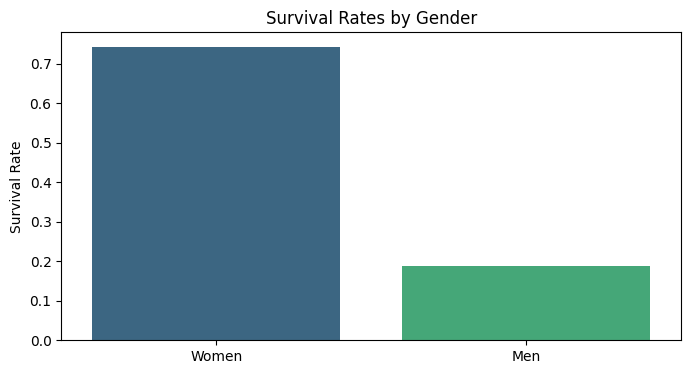

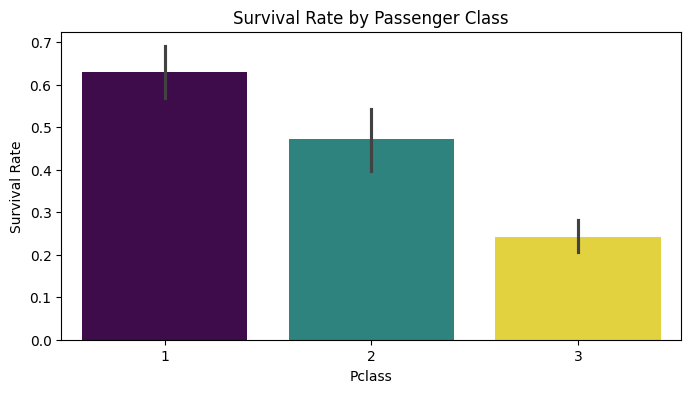

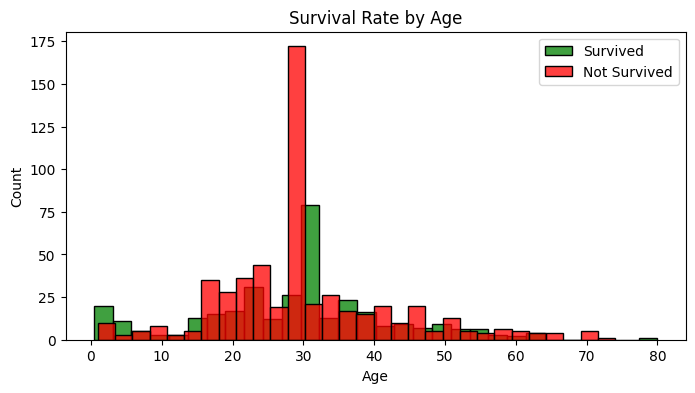


Your submission was successfully saved as 'submission.csv'!


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Visualize the survival rates by gender
plt.figure(figsize=(8,4))
sns.barplot(x=['Women', 'Men'], y=[rate_women, rate_men], hue=['Women', 'Men'], palette='viridis', legend=False)
plt.title('Survival Rates by Gender')
plt.ylabel('Survival Rate')
plt.show()

# Prepare the data for the RandomForest model
y = train_data["Survived"]
features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

# Train the RandomForest model
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

# Additional Visualizations
# Survival rate by Pclass
plt.figure(figsize=(8, 4))
sns.barplot(x='Pclass', y='Survived', hue='Pclass', data=train_data, palette='viridis', legend=False)
plt.title('Survival Rate by Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

# Survival rate by Age
plt.figure(figsize=(8, 4))
sns.histplot(train_data[train_data['Survived'] == 1]['Age'], bins=30, kde=False, color='green', label='Survived')
sns.histplot(train_data[train_data['Survived'] == 0]['Age'], bins=30, kde=False, color='red', label='Not Survived')
plt.legend()
plt.title('Survival Rate by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Save the predictions to a CSV file
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("\nYour submission was successfully saved as 'submission.csv'!")